In [10]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt 

In [11]:
pd.read_csv("G:\jupyter notebook\GUVI pandas\scratch/train.csv")


,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.95577,0.0,8.14,0,0.538,6.047,88.8,4.4534,4,307.0,21.0,306.38,17.28,14.8
1,1,0.02875,28.0,15.04,0,0.464,6.211,28.9,3.6659,4,270.0,18.2,396.33,6.21,25.0
2,2,1.22358,0.0,19.58,0,0.605,6.943,97.4,1.8773,5,403.0,14.7,363.43,4.59,41.3
3,3,5.66637,0.0,18.10,0,0.740,6.219,100.0,2.0048,24,666.0,20.2,395.69,16.59,18.4
4,4,0.04544,0.0,3.24,0,0.460,6.144,32.2,5.8736,4,430.0,16.9,368.57,9.09,19.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,0.03615,80.0,4.95,0,0.411,6.630,23.4,5.1167,4,245.0,19.2,396.90,4.70,27.9
396,396,0.17505,0.0,5.96,0,0.499,5.966,30.2,3.8473,5,279.0,19.2,393.43,10.13,24.7
397,397,6.65492,0.0,18.10,0,0.713,6.317,83.0,2.7344,24,666.0,20.2,396.90,13.99,19.5
398,398,0.13117,0.0,8.56,0,0.520,6.127,85.2,2.1224,5,384.0,20.9,387.69,14.09,20.4


In [12]:
x_train=np.loadtxt("G:\jupyter notebook\GUVI pandas\scratch/train.csv",skiprows=1,delimiter=",",
                   usecols=(1,2,3,4,5,6,7,8,9,10,11,12,13))
x_train.shape

(400, 13)

In [13]:
y_train=np.loadtxt("G:\jupyter notebook\GUVI pandas\scratch/train.csv",skiprows=1,delimiter=",",
                   usecols=(14,))

In [14]:
x_test=np.loadtxt("G:\jupyter notebook\GUVI pandas\scratch/test.csv",skiprows=1,delimiter=",",usecols=(1,2,3,4,5,6,7,8,9,10,11,12,13))
x_test.shape

(105, 13)

# scalinf the features

In [15]:
scaler=MinMaxScaler()
scaler.fit(x_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

# adding constant

In [16]:
x_train_scaled=np.hstack((x_train_scaled,np.ones((400,1))))
x_test_scaled=np.hstack((x_test_scaled,np.ones((105,1))))

# tranform dependent feature

In [17]:
y_train_scaled=np.log(y_train)

# Defining our own model taking lambda , p-norm , learning rate as inputs

In [18]:
def linear_Regression(x_train,y_train,lamda=0,p_norm=1,learning_rate=0.001,summary=False):
    if summary:
        print("-----------------------------------------------------------------------------------------------------------------")
        print(f"The learning rate is set ----------------------------{learning_rate}")
        print("If not set lamda ,default is set---------------------0")
    e=1000000
    variables=x_train
    variables=np.transpose(variables)
    target=y_train
    
    parameters=np.zeros(variables.shape[0])
    for i in range(20000):
        y_predict=np.dot(parameters,variables)
        ans=target-y_predict
    #     derivative=variables*ans
    #     parameters=np.diag(np.multiply(parameters,np.eye(3))+0.01*derivative)
        parameters=parameters+learning_rate*(np.sum(variables*ans,axis=1)/variables.shape[0]) + p_norm*lamda*np.power(abs(parameters),p_norm-1)
        
        keeper=parameters
        
        mse=1/variables.shape[0]*np.sum((target-y_predict)**2)+lamda*np.sum(np.power(abs(parameters),p_norm))
        if mse>e:
            if summary:
                print("The number of iteration it to converge is-----------",i+1) 
                print("The cost functio error is---------------------------",round(e,4))
                print("\n\n")
                print("The function returns the coeff and constant")
            return keeper
        e=mse
    if summary:
        print("The number of iteration it to converge is-----------",i+1)   
        print("The cost functio error is---------------------------",round(mse,4))
        print("This function returns the coeff and constant")
        print("-----------------------------------------------------------------------------------------------------------------")

    return parameters

In [19]:
def score(x_train,y_train,linear_eqn):
    y_predict=np.dot(x_train,linear_eqn)
    return r2_score(y_train,y_predict)


def prediction(x_test):
    return np.exp(np.dot(x_test,linear_eqn))  #we are making antilog to get our y



In [20]:
# Getting coefficinets from our model
linear_eqn=linear_Regression(x_train_scaled,y_train_scaled,lamda=0,summary=True)

-----------------------------------------------------------------------------------------------------------------
The learning rate is set ----------------------------0.001
If not set lamda ,default is set---------------------0
The number of iteration it to converge is----------- 20000
The cost functio error is--------------------------- 0.9934
This function returns the coeff and constant
-----------------------------------------------------------------------------------------------------------------


In [21]:
print("The score of our model is :",score(x_train_scaled,y_train_scaled,linear_eqn))

The score of our model is : 0.7927973282198923


# Exporting the csv file for test csv

In [22]:
y_predict=prediction(x_test_scaled)  #getting y_prediction for test case

In [23]:
x_test_IDS=np.loadtxt("G:\jupyter notebook\GUVI pandas\scratch/test.csv",skiprows=1,delimiter=",",usecols=(0,))


final_csv=pd.DataFrame({"ID":x_test_IDS,"OUTPUT":y_predict})

In [24]:
final_csv.to_csv("G:\jupyter notebook\GUVI pandas\scratch/Output",index=False)

# For different norms p1=1.75, p2=1.5, p3=1.3 and for diff lambda the error percentage are 

In [25]:
diff_lamdas=[1e-06, 1e-05, 0.0001, 0.001, 0.01]
error_percentage=[]
for i in [1.3,1.5,1.75]:
    inter=[]
    for j in diff_lamdas:
        linear_eqn =linear_Regression(x_train_scaled,y_train_scaled,lamda=j,p_norm=i,learning_rate=0.01)
        inter.append(1-score(x_train_scaled,y_train_scaled,linear_eqn))  # error= 1- score
    error_percentage.append(inter)
    

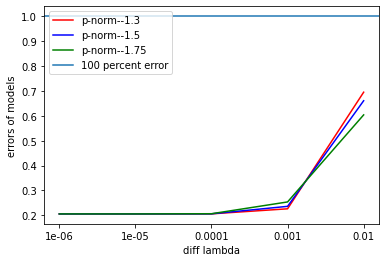

In [26]:
plt.plot(["1e-06", "1e-05", "0.0001", "0.001", "0.01"],error_percentage[0],color="r",label="p-norm--1.3")
plt.plot(["1e-06", "1e-05", "0.0001", "0.001", "0.01"],error_percentage[1],color="b",label="p-norm--1.5")
plt.plot(["1e-06", "1e-05", "0.0001", "0.001", "0.01"],error_percentage[2],color="g",label="p-norm--1.75")
plt.axhline(y=1,label="100 percent error")
plt.legend(loc="upper left")
plt.xlabel("diff lambda")
plt.ylabel("errors of models")
plt.show()

# Fixing p-norm==2 and for different lambda  the scores are

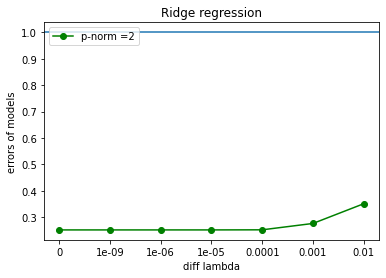

In [27]:
diff_lamdas=[0,1e-09,1e-06, 1e-05, 0.0001, 0.001, 0.01,0.1]
error_percentage=[]
for j in diff_lamdas:
    linear_eqn =linear_Regression(x_train_scaled,y_train,lamda=j,p_norm=2,learning_rate=0.01)
    error_percentage.append(1-score(x_train_scaled,y_train,linear_eqn)) #error = 1-score

plt.plot(["0","1e-09","1e-06", "1e-05", "0.0001", "0.001", "0.01"],error_percentage[:-1],color="g",label="p-norm =2",marker="o")
plt.legend(loc="upper left")
plt.xlabel("diff lambda")
plt.ylabel("errors of models")
plt.title("Ridge regression")
plt.axhline(y=1)
plt.show()

# closed form method

#  β=(XTX)−1XTy .

In [28]:
Xt_X_inverse=np.linalg.inv(np.dot(np.transpose(x_train_scaled),x_train_scaled))

In [29]:
Xt_X_inverse_Xt=np.dot(Xt_X_inverse,np.transpose(x_train_scaled))

In [30]:
coefficients=np.dot(Xt_X_inverse_Xt,y_train_scaled.reshape(x_train_scaled.shape[0],1)).reshape(-1,)

In [31]:
coefficients.shape,x_train_scaled.shape

((14,), (400, 14))

In [32]:
y_pred=np.dot(x_train_scaled,coefficients)
print("The score of the closed form is ",r2_score(y_train_scaled,y_pred))

The score of the closed form is  0.7943142590047986
